# 1. 데이터 가져오기

## 보스턴 주택가격 정보 가져오기 

In [1]:
from pycaret.datasets import get_data
boston = get_data('boston')

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## 데이터 상태확인하기 

In [2]:
boston.shape

(506, 14)

In [31]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## 데이터 분리 

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test = train_test_split(boston, test_size=0.2)

# 2. 학습 및 검증 데이터 세팅 

In [5]:
from pycaret.regression import *

In [6]:
exp_name = setup(data = X_train,  target = 'medv')

,Description,Value
0,Session id,4990
1,Target,medv
2,Target type,Regression
3,Original data shape,"(404, 14)"
4,Transformed data shape,"(404, 14)"
5,Transformed train set shape,"(282, 14)"
6,Transformed test set shape,"(122, 14)"
7,Numeric features,13
8,Preprocess,True
9,Imputation type,simple


# 3. 모델  처리 

## 모델 정보 확인하기 

In [7]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


## 하나 모델 생성하기

In [8]:
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.6904,9.8022,3.1308,0.8011,0.1506,0.1388
1,4.3497,42.6535,6.5310,0.3907,0.5376,0.2289
2,3.2947,16.1340,4.0167,0.8296,0.3002,0.2041
3,3.7832,26.8118,5.1780,0.7905,0.2305,0.1971
4,3.2743,16.8331,4.1028,0.7152,0.1881,0.1655
5,3.5239,29.7484,5.4542,0.5196,0.3652,0.1739
6,3.0200,15.1117,3.8874,0.8023,0.1803,0.1345
7,2.2654,9.8058,3.1314,0.8665,0.1227,0.0944
8,4.8260,51.6218,7.1848,0.6220,0.2339,0.1875


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## 예측 모델 만들기

In [9]:
pred_holdout = predict_model(lr)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,3.9369,38.7431,6.2244,0.5565,0.3536,0.1843


## 사용하지 않은 결과로 확인하기 

In [10]:
pred_unseen = predict_model(lr, data = X_test)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,2.9315,15.3903,3.9231,0.7940,0.1725,0.1575


# 3.  모델 평가 

In [11]:
%matplotlib inline

In [12]:
import matplotlib.pyplot as plt

## 매트릭스 확인하기

In [13]:
all_metrics = get_metrics()

In [14]:
all_metrics

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Custom
ID,,,,,,,,
mae,MAE,MAE,<function mean_absolute_error at 0x15c72a550>,neg_mean_absolute_error,pred,{},False,False
mse,MSE,MSE,<function mean_squared_error at 0x15c72a700>,neg_mean_squared_error,pred,{},False,False
rmse,RMSE,RMSE,<function mean_squared_error at 0x15c72a700>,neg_root_mean_squared_error,pred,{'squared': False},False,False
r2,R2,R2,<function r2_score at 0x15c72a9d0>,r2,pred,{},True,False
rmsle,RMSLE,RMSLE,<function RMSLEMetricContainer.__init__.<local...,"make_scorer(root_mean_squared_log_error, great...",pred,{},False,False
mape,MAPE,MAPE,<function MAPEMetricContainer.__init__.<locals...,"make_scorer(mean_absolute_percentage_error, gr...",pred,{},False,False


## 매트릭스 추가하기 

In [15]:
from sklearn.metrics import explained_variance_score
add_metric('evs', 'EVS', explained_variance_score)

Name                                                               EVS
Display Name                                                       EVS
Score Function       <function explained_variance_score at 0x15c72a...
Scorer                           make_scorer(explained_variance_score)
Target                                                            pred
Args                                                                {}
Greater is Better                                                 True
Custom                                                            True
Name: evs, dtype: object

In [16]:
all_metrics = get_metrics()

In [17]:
all_metrics

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Custom
ID,,,,,,,,
mae,MAE,MAE,<function mean_absolute_error at 0x15c72a550>,neg_mean_absolute_error,pred,{},False,False
mse,MSE,MSE,<function mean_squared_error at 0x15c72a700>,neg_mean_squared_error,pred,{},False,False
rmse,RMSE,RMSE,<function mean_squared_error at 0x15c72a700>,neg_root_mean_squared_error,pred,{'squared': False},False,False
r2,R2,R2,<function r2_score at 0x15c72a9d0>,r2,pred,{},True,False
rmsle,RMSLE,RMSLE,<function RMSLEMetricContainer.__init__.<local...,"make_scorer(root_mean_squared_log_error, great...",pred,{},False,False
mape,MAPE,MAPE,<function MAPEMetricContainer.__init__.<locals...,"make_scorer(mean_absolute_percentage_error, gr...",pred,{},False,False
evs,EVS,EVS,<function explained_variance_score at 0x15c72a...,make_scorer(explained_variance_score),pred,{},True,True


## 평가모델 확인하기 

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

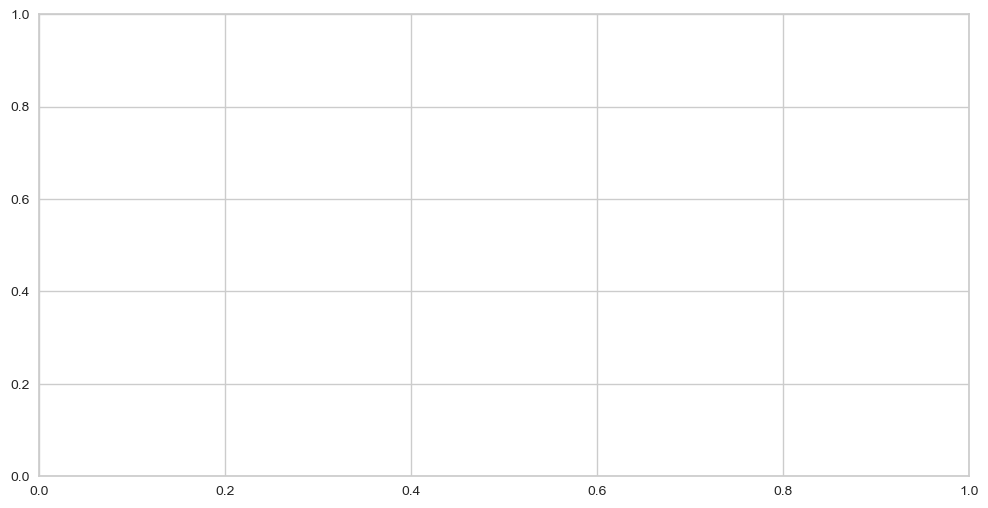

In [18]:
evaluate_model(lr)

# 5. 여러 모델 비교하기 

## 최고 모델 확인하기

In [19]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,EVS,TT (Sec)
catboost,CatBoost Regressor,2.2083,11.3435,3.1892,0.8708,0.1326,0.1030,0.8767,0.4230
et,Extra Trees Regressor,2.2549,11.3799,3.2238,0.8699,0.1328,0.1057,0.8731,0.2090
gbr,Gradient Boosting Regressor,2.3566,11.7052,3.2585,0.8589,0.1436,0.1140,0.8618,0.2000
xgboost,Extreme Gradient Boosting,2.3961,12.2223,3.3739,0.8512,0.1434,0.1119,0.8543,0.2010
rf,Random Forest Regressor,2.4087,12.6894,3.4142,0.8501,0.1459,0.1157,0.8524,0.2200
lightgbm,Light Gradient Boosting Machine,2.5356,13.0384,3.5197,0.8410,0.1526,0.1235,0.8441,0.2550
ada,AdaBoost Regressor,2.8048,15.7292,3.8528,0.8141,0.1732,0.1440,0.8204,0.2050
lr,Linear Regression,3.4491,23.5190,4.6700,0.7171,0.2499,0.1690,0.7258,0.1950
lar,Least Angle Regression,3.4491,23.5190,4.6700,0.7171,0.2499,0.1690,0.7258,0.1950
ridge,Ridge Regression,3.4208,23.7976,4.6850,0.7136,0.2472,0.1679,0.7236,0.1840


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [20]:
best_model

In [21]:
best_modes = compare_models(n_select=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,EVS,TT (Sec)
catboost,CatBoost Regressor,2.2083,11.3435,3.1892,0.8708,0.1326,0.1030,0.8767,0.1930
et,Extra Trees Regressor,2.2549,11.3799,3.2238,0.8699,0.1328,0.1057,0.8731,0.2020
gbr,Gradient Boosting Regressor,2.3566,11.7052,3.2585,0.8589,0.1436,0.1140,0.8618,0.2010
xgboost,Extreme Gradient Boosting,2.3961,12.2223,3.3739,0.8512,0.1434,0.1119,0.8543,0.1990
rf,Random Forest Regressor,2.4087,12.6894,3.4142,0.8501,0.1459,0.1157,0.8524,0.1970
lightgbm,Light Gradient Boosting Machine,2.5356,13.0384,3.5197,0.8410,0.1526,0.1235,0.8441,0.1960
ada,AdaBoost Regressor,2.8048,15.7292,3.8528,0.8141,0.1732,0.1440,0.8204,0.1950
lr,Linear Regression,3.4491,23.5190,4.6700,0.7171,0.2499,0.1690,0.7258,0.1960
lar,Least Angle Regression,3.4491,23.5190,4.6700,0.7171,0.2499,0.1690,0.7258,0.1940
ridge,Ridge Regression,3.4208,23.7976,4.6850,0.7136,0.2472,0.1679,0.7236,0.1910


Processing:   0%|          | 0/89 [00:00<?, ?it/s]

In [22]:
best_modes

 ExtraTreesRegressor(n_jobs=-1, random_state=4990),
 GradientBoostingRegressor(random_state=4990),
 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=4990, ...),
 RandomForestRegressor(n_jobs=-1, random_state=4990)]

# 7. 모델 해석하기 

In [23]:
xgboost = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE,EVS
Fold,,,,,,,
0,2.4113,10.8343,3.2915,0.7802,0.1628,0.1248,0.7835
1,2.8480,20.8996,4.5716,0.7014,0.1819,0.1253,0.7025
2,2.2839,9.4665,3.0768,0.9000,0.1424,0.1160,0.9001
3,2.2298,9.2153,3.0357,0.9280,0.1480,0.1162,0.9281
4,2.0986,8.9354,2.9892,0.8488,0.1298,0.0966,0.8488
5,2.5008,9.6642,3.1087,0.8439,0.1598,0.1224,0.8594
6,2.1956,7.3414,2.7095,0.9040,0.1195,0.1064,0.9073
7,1.9206,5.4305,2.3303,0.9261,0.1144,0.0974,0.9283
8,3.4698,31.1866,5.5845,0.7717,0.1775,0.1317,0.7765


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

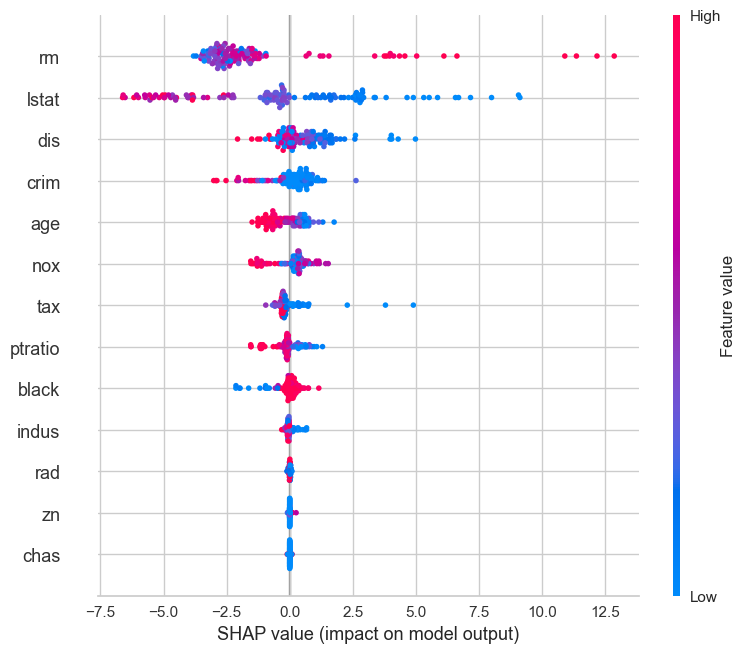

In [24]:
interpret_model(xgboost)

In [25]:
top3 = compare_models(n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,EVS,TT (Sec)
catboost,CatBoost Regressor,2.2083,11.3435,3.1892,0.8708,0.1326,0.1030,0.8767,0.1930
et,Extra Trees Regressor,2.2549,11.3799,3.2238,0.8699,0.1328,0.1057,0.8731,0.2120
gbr,Gradient Boosting Regressor,2.3566,11.7052,3.2585,0.8589,0.1436,0.1140,0.8618,0.2170
xgboost,Extreme Gradient Boosting,2.3961,12.2223,3.3739,0.8512,0.1434,0.1119,0.8543,0.2120
rf,Random Forest Regressor,2.4087,12.6894,3.4142,0.8501,0.1459,0.1157,0.8524,0.2000
lightgbm,Light Gradient Boosting Machine,2.5356,13.0384,3.5197,0.8410,0.1526,0.1235,0.8441,0.2020
ada,AdaBoost Regressor,2.8048,15.7292,3.8528,0.8141,0.1732,0.1440,0.8204,0.2030
lr,Linear Regression,3.4491,23.5190,4.6700,0.7171,0.2499,0.1690,0.7258,0.1970
lar,Least Angle Regression,3.4491,23.5190,4.6700,0.7171,0.2499,0.1690,0.7258,0.1980
ridge,Ridge Regression,3.4208,23.7976,4.6850,0.7136,0.2472,0.1679,0.7236,0.1970


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

# 8. 모델 튜닝하기 

In [26]:
tuned_top3 = [tune_model(i) for i in top3]

,MAE,MSE,RMSE,R2,RMSLE,MAPE,EVS
Fold,,,,,,,
0,2.3997,7.8320,2.7986,0.8411,0.1410,0.1244,0.8463
1,2.7934,17.8295,4.2225,0.7453,0.1761,0.1285,0.7455
2,2.2196,11.1358,3.3370,0.8824,0.1906,0.1399,0.8824
3,2.6467,10.9111,3.3032,0.9147,0.1632,0.1417,0.9156
4,2.2352,8.3898,2.8965,0.8581,0.1355,0.1135,0.8581
5,2.3533,8.9786,2.9964,0.8550,0.1207,0.1033,0.8673
6,2.1819,8.1902,2.8618,0.8929,0.1269,0.1062,0.8949
7,2.1532,7.6460,2.7651,0.8959,0.1269,0.1098,0.8974
8,3.7982,36.2359,6.0196,0.7347,0.1980,0.1466,0.7407


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE,EVS
Fold,,,,,,,
0,2.1527,7.3828,2.7171,0.8502,0.1311,0.1079,0.8558
1,2.8754,16.1002,4.0125,0.7700,0.1703,0.1375,0.7729
2,2.2570,12.8423,3.5836,0.8644,0.1911,0.1374,0.8650
3,3.1181,15.3972,3.9239,0.8797,0.1764,0.1587,0.8804
4,2.2688,9.6175,3.1012,0.8373,0.1445,0.1138,0.8387
5,2.1413,7.0427,2.6538,0.8863,0.1105,0.0970,0.8971
6,2.1357,7.2660,2.6956,0.9050,0.1199,0.1022,0.9073
7,1.9631,7.9917,2.8270,0.8912,0.1270,0.1025,0.8913
8,3.6269,36.5812,6.0482,0.7322,0.1824,0.1320,0.7397


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE,EVS
Fold,,,,,,,
0,2.2015,7.7335,2.7809,0.8431,0.1325,0.1102,0.8441
1,2.4867,16.3896,4.0484,0.7659,0.1742,0.1179,0.7661
2,2.3297,10.5035,3.2409,0.8891,0.1405,0.1151,0.8908
3,2.5590,10.7860,3.2842,0.9157,0.1380,0.1210,0.9157
4,1.8347,6.6742,2.5835,0.8871,0.1238,0.0910,0.8871
5,2.4836,9.7337,3.1199,0.8428,0.1392,0.1139,0.8497
6,2.2405,8.4824,2.9124,0.8891,0.1332,0.1068,0.8893
7,2.1653,6.2128,2.4925,0.9154,0.1247,0.1115,0.9165
8,2.9893,23.6321,4.8613,0.8270,0.1640,0.1187,0.8338


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


## 앙상블 처리하기 

In [27]:
blender = blend_models(tuned_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE,EVS
Fold,,,,,,,
0,1.8165,5.6955,2.3865,0.8844,0.1149,0.0928,0.8871
1,2.6325,16.3391,4.0422,0.7666,0.1664,0.1250,0.7680
2,1.9711,8.8214,2.9701,0.9068,0.1473,0.1082,0.9068
3,2.4427,10.1693,3.1889,0.9205,0.1408,0.1208,0.9208
4,1.6857,5.3176,2.3060,0.9100,0.1047,0.0820,0.9102
5,2.2937,8.5460,2.9233,0.8620,0.1278,0.1033,0.8743
6,2.0404,6.7922,2.6062,0.9112,0.1183,0.0997,0.9132
7,1.7582,5.0833,2.2546,0.9308,0.1039,0.0888,0.9325
8,3.1494,28.9613,5.3816,0.7880,0.1619,0.1126,0.7974


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [28]:
stacker = stack_models(tuned_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE,EVS
Fold,,,,,,,
0,2.0192,6.4136,2.5325,0.8699,0.1196,0.1015,0.8700
1,2.6850,20.8473,4.5659,0.7022,0.1945,0.1238,0.7025
2,1.9891,7.9302,2.8161,0.9162,0.1331,0.1033,0.9167
3,2.2605,9.2539,3.0420,0.9277,0.1489,0.1202,0.9302
4,1.6236,5.4856,2.3421,0.9072,0.1048,0.0802,0.9073
5,1.9935,6.8422,2.6158,0.8895,0.1237,0.0944,0.8935
6,2.3305,7.6510,2.7661,0.8999,0.1296,0.1152,0.9031
7,1.5055,4.9584,2.2268,0.9325,0.0931,0.0706,0.9338
8,3.1943,31.6926,5.6296,0.7680,0.1776,0.1086,0.7887


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

## 최고 모델 확인하기 

In [29]:
best_mae_model = automl(optimize = 'MAE')

In [30]:
best_mae_model

StackingRegressor(cv=5,
                  estimators=[('CatBoost Regressor',
                               <catboost.core.CatBoostRegressor object at 0x297ac7ac0>),
                              ('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1,
                                                   random_state=4990)),
                              ('Gradient Boosting Regressor',
                               GradientBoostingRegressor(learning_rate=0.2,
                                                         max_depth=9,
                                                         max_features=1.0,
                                                         min_impurity_decrease=0.5,
                                                         min_samples_leaf=5,
                                                         min_samples_split=5,
                                                         n_estimators=60,
                                                         random_state=4990,
                                                         subsample=0.8))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1,
                  passthrough=True)